# Импорт

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, MaxPooling1D, AveragePooling1D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import load_model
from keras.callbacks import LambdaCallback
from IPython.display import clear_output


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Функции

In [ ]:
def getPred(currModel, xVal, yVal, yScaler):
  # функция предсказания
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)

  return (predVal, yValUnscaled)

def showPredict(start, step, channel, predVal, yValUnscaled):
  # отрисовка предсказаний
  plt.plot(predVal[start:start+step, channel], label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, 0], label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение Close')
  plt.legend()
  plt.show()

def correlate(a, b):
  # рассчет корреляции
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()

  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # ОТрисовать графики корреляции прогнозированного сигнала с с правильным
  for ch in channels:
    corr = []
    yLen = yValUnscaled.shape[0]

    for i in range(corrSteps):
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:,0]))
    
    own_corr = []

    for i in range(corrSteps):
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:,ch]))
  
    plt.plot(corr, label = 'Предсказание на '+ str(ch+1)+ 'шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()



**LIGHT в другом ноутбуке!**

# Pro

В этот раз не смог выделить много времени на домашку, поэтому сделал PRO вариант 3, чтобы ДЗ была засчитана. А вот в варианте 2 не успел сделать вторую часть со взглядом вглубь, только с расширением xTrain.
Обязательно вернусь и к варианту 1 и к варианту 2

## PRO 3

In [ ]:
columns = ['date', 'traff']
data3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/20 Временные ряды/traff.csv', names=columns)
data3 = data3.iloc[:,1]

In [ ]:
data3 = data3.apply(lambda x:int(x.replace(',','').replace('.',''))//100)

In [ ]:
data3

0       22226
1       29593
2       31726
3       32684
4       31820
        ...  
1090    29801
1091    34913
1092    37665
1093    32643
1094    28212
Name: traff, Length: 1095, dtype: int64

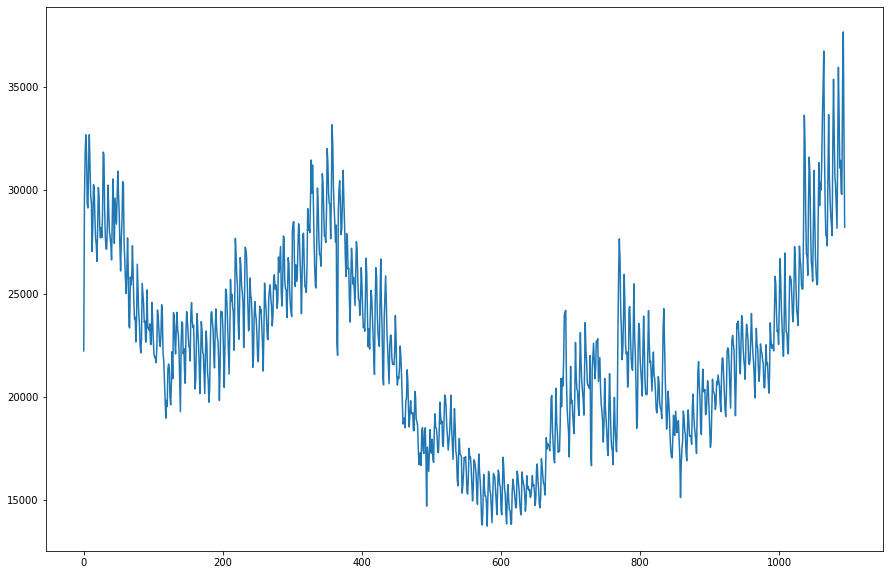

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(data3)
plt.show()

In [ ]:
xLen = 60
valLen = 150

trainLen = data3.shape[0]-valLen

xTrain, xTest = np.array(data3[:trainLen]).reshape(-1,1), np.array(data3[trainLen+xLen+2:]).reshape(-1,1)

xScaler = MinMaxScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

yTrain, yTest = np.reshape(np.array(data3[:trainLen]),(-1,1)), np.reshape(np.array(data3[trainLen+xLen+2:]),(-1,1))
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)



In [ ]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(945, 1)
(945, 1)
(88, 1)
(88, 1)


In [ ]:
trainDataGen = TimeseriesGenerator(xTrain, yTrain, length=xLen, stride=1, batch_size=10)
testDataGen = TimeseriesGenerator(xTest,yTest, length=xLen, stride=1, batch_size=10)

DataGen = TimeseriesGenerator(xTest,yTest, length=xLen, stride=1, batch_size=len(xTest))

xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])
  
xVal = np.array(xVal)
yVal = np.array(yVal)

In [ ]:
trainDataGen.length

60

Epoch 1/100
89/89 [==============================] - 7s 81ms/step - loss: 0.0276 - val_loss: 0.0846
Epoch 2/100
89/89 [==============================] - 7s 79ms/step - loss: 0.0152 - val_loss: 0.0222
Epoch 3/100
89/89 [==============================] - 7s 81ms/step - loss: 0.0117 - val_loss: 0.0146
Epoch 4/100
89/89 [==============================] - 7s 81ms/step - loss: 0.0094 - val_loss: 0.0083
Epoch 5/100
89/89 [==============================] - 7s 80ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 6/100
89/89 [==============================] - 7s 80ms/step - loss: 0.0078 - val_loss: 0.0127
Epoch 7/100
89/89 [==============================] - 7s 80ms/step - loss: 0.0085 - val_loss: 0.0116
Epoch 8/100
89/89 [==============================] - 7s 80ms/step - loss: 0.0079 - val_loss: 0.0069
Epoch 9/100
89/89 [==============================] - 7s 80ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 10/100
89/89 [==============================] - 7s 80ms/step - loss: 0.0065 - val_loss: 0.0061

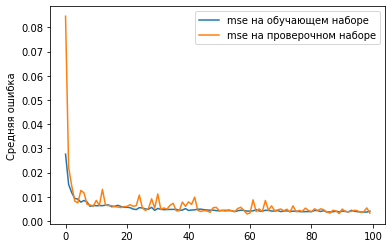

In [ ]:
modelD = Sequential()
modelD.add(Conv1D(200, 5, padding='same', input_shape = (xLen, 1), activation='tanh'))
modelD.add(Conv1D(200, 5, padding='same', activation='tanh'))

modelD.add(Conv1D(200, 5, padding='same', activation='tanh'))
modelD.add(Conv1D(200, 5, padding='same', activation='tanh'))
# modelD.add(AveragePooling1D(4))
modelD.add(Flatten())
modelD.add(Dense(200, activation='tanh'))
modelD.add(Dropout(0.3))
modelD.add(Dense(100, activation='tanh'))
modelD.add(Dropout(0.3))
modelD.add(Dense(1, activation='linear'))

modelD.compile(loss='mse', optimizer=Adam(lr=0.000008))

history = modelD.fit_generator(trainDataGen,
                               epochs=100,
                               verbose=1,
                               validation_data=testDataGen)

plt.plot(history.history['loss'], label='mse на обучающем наборе')
plt.plot(history.history['val_loss'], label='mse на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

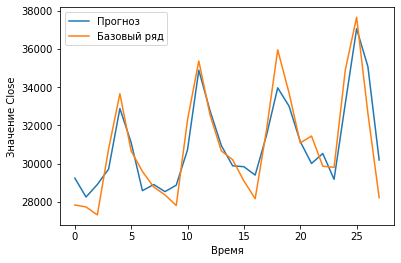

In [ ]:
currModel = modelD
(predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

showPredict(0, 160, 0, predVal, yValUnscaled)

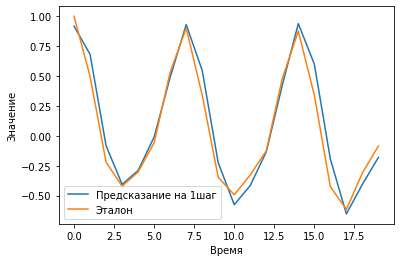

In [ ]:
showCorr([0], 20, predVal, yValUnscaled)

## Pro 2

In [ ]:
base_data16 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/20 Временные ряды/16_17.csv', sep=';')
base_data18 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/20 Временные ряды/18_19.csv', sep=';')
data16_17 = base_data16.iloc[:,2:]
data18_19 = base_data18.iloc[:,2:]

In [ ]:
data = data16_17.copy()
data = pd.concat([data16_17, data18_19])

In [ ]:
data

,OPEN,MAX,MIN,CLOSE,VOLUME
0,2351.0,2355.8,2350.0,2350.0,2547
1,2352.9,2355.7,2350.0,2355.7,195
2,2355.6,2356.0,2351.4,2354.1,257
3,2354.5,2355.0,2351.2,2353.7,763
4,2353.1,2353.9,2353.1,2353.6,231
...,...,...,...,...,...
217942,5183.5,5183.5,5183.5,5183.5,31523
217943,5183.5,5183.5,5183.5,5183.5,5090
217944,5183.5,5183.5,5183.5,5183.5,230
217945,5183.5,5183.5,5183.5,5183.5,5


In [ ]:
data.insert(5,'diff1',0)
data.insert(6,'diff2',0)
data.insert(7,'diff3',0)
data.insert(8,'diff4',0)
data.insert(9,'diff5',0)
data.insert(10,'diff6',0)
data.insert(11,'abs_diff1',0)
data.insert(12,'abs_diff2',0)
data.insert(13,'abs_diff3',0)
data.insert(14,'abs_diff4',0)
data.insert(15,'abs_diff5',0)
data.insert(16,'abs_diff6',0)
data.insert(17,'mult1',0)
data.insert(18,'mult2',0)
data.insert(19,'mult3',0)
data.insert(20,'mult4',0)
data.insert(21,'mult5',0)
data.insert(22,'mult6',0)
data.insert(23,'rev1',0)
data.insert(24,'rev2',0)
data.insert(25,'rev3',0)
data.insert(26,'rev4',0)
data.insert(27,'first_der1',0)
data.insert(28,'first_der2',0)
data.insert(29,'first_der3',0)
data.insert(30,'first_der4',0)
data.insert(31,'sec_der1',0)
data.insert(32,'sec_der2',0)
data.insert(33,'sec_der3',0)
data.insert(34,'sec_der4',0)


In [ ]:
data = data.copy().reset_index()
data = data.drop('index', axis=1)

In [ ]:
data

,OPEN,MAX,MIN,CLOSE,VOLUME,diff1,diff2,diff3,diff4,diff5,diff6,abs_diff1,abs_diff2,abs_diff3,abs_diff4,abs_diff5,abs_diff6,mult1,mult2,mult3,mult4,mult5,mult6,rev1,rev2,rev3,rev4,first_der1,first_der2,first_der3,first_der4,sec_der1,sec_der2,sec_der3,sec_der4
0,2351.0,2355.8,2350.0,2350.0,2547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2352.9,2355.7,2350.0,2355.7,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2355.6,2356.0,2351.4,2354.1,257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2354.5,2355.0,2351.2,2353.7,763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2353.1,2353.9,2353.1,2353.6,231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481867,5183.5,5183.5,5183.5,5183.5,31523,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
481868,5183.5,5183.5,5183.5,5183.5,5090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
481869,5183.5,5183.5,5183.5,5183.5,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
481870,5183.5,5183.5,5183.5,5183.5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['diff1'] = data['OPEN'] - data['MAX']
data['diff2'] = data['OPEN'] - data['MIN']
data['diff3'] = data['OPEN'] - data['CLOSE']
data['diff4'] = data['MAX'] - data['MIN']
data['diff5'] = data['MAX'] - data['CLOSE']
data['diff6'] = data['MIN'] - data['CLOSE']
data['abs_diff1'] = abs(data['OPEN'] - data['MAX'])
data['abs_diff2'] = abs(data['OPEN'] - data['MIN'])
data['abs_diff3'] = abs(data['OPEN'] - data['CLOSE'])
data['abs_diff4'] = abs(data['MAX'] - data['MIN'])
data['abs_diff5'] = abs(data['MAX'] - data['CLOSE'])
data['abs_diff6'] = abs(data['MIN'] - data['CLOSE'])
data['mult1'] = data['OPEN'] * data['MAX']
data['mult2'] = data['OPEN'] * data['MIN']
data['mult3'] = data['OPEN'] * data['CLOSE']
data['mult4'] = data['MAX'] * data['MIN']
data['mult5'] = data['MAX'] * data['CLOSE']
data['mult6'] = data['MIN'] * data['CLOSE']
data['rev1'] = 1 / (data['OPEN'] + 1e-3)
data['rev2'] = 1 / (data['MAX'] + 1e-3)
data['rev3'] = 1 / (data['MIN'] + 1e-3)
data['rev4'] = 1 / (data['CLOSE'] + 1e-3)

data['first_der1'][1:] = data['OPEN'][1:].to_numpy() - data['OPEN'][:-1].to_numpy()
data['first_der2'][1:] = data['MAX'][1:].to_numpy() - data['MAX'][:-1].to_numpy()
data['first_der3'][1:] = data['MIN'][1:].to_numpy() - data['MIN'][:-1].to_numpy()
data['first_der4'][1:] = data['CLOSE'][1:].to_numpy() - data['CLOSE'][:-1].to_numpy()

data['sec_der1'][2:] = data['OPEN'][2:].to_numpy() - 2 * data['OPEN'][1:-1].to_numpy() + data['OPEN'][:-2].to_numpy()
data['sec_der2'][2:] = data['MAX'][2:].to_numpy() - 2 * data['MAX'][1:-1].to_numpy() + data['MAX'][:-2].to_numpy()
data['sec_der3'][2:] = data['MIN'][2:].to_numpy() - 2 * data['MIN'][1:-1].to_numpy() + data['MIN'][:-2].to_numpy()
data['sec_der4'][2:] = data['CLOSE'][2:].to_numpy() - 2 * data['CLOSE'][1:-1].to_numpy() + data['CLOSE'][:-2].to_numpy()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26:

In [ ]:
data

,OPEN,MAX,MIN,CLOSE,VOLUME,diff1,diff2,diff3,diff4,diff5,diff6,abs_diff1,abs_diff2,abs_diff3,abs_diff4,abs_diff5,abs_diff6,mult1,mult2,mult3,mult4,mult5,mult6,rev1,rev2,rev3,rev4,first_der1,first_der2,first_der3,first_der4,sec_der1,sec_der2,sec_der3,sec_der4
0,2351.0,2355.8,2350.0,2350.0,2547,-4.8,1.0,1.0,5.8,5.8,0.0,4.8,1.0,1.0,5.8,5.8,0.0,5538485.80,5524850.00,5524850.00,5536130.00,5536130.00,5522500.00,0.000425,0.000424,0.000426,0.000426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2352.9,2355.7,2350.0,2355.7,195,-2.8,2.9,-2.8,5.7,0.0,-5.7,2.8,2.9,2.8,5.7,0.0,5.7,5542726.53,5529315.00,5542726.53,5535895.00,5549322.49,5535895.00,0.000425,0.000425,0.000426,0.000425,1.9,-0.1,0.0,5.7,0.0,0.0,0.0,0.0
2,2355.6,2356.0,2351.4,2354.1,257,-0.4,4.2,1.5,4.6,1.9,-2.7,0.4,4.2,1.5,4.6,1.9,2.7,5549793.60,5538957.84,5545317.96,5539898.40,5546259.60,5535430.74,0.000425,0.000424,0.000425,0.000425,2.7,0.3,1.4,-1.6,0.8,0.4,1.4,-7.3
3,2354.5,2355.0,2351.2,2353.7,763,-0.5,3.3,0.8,3.8,1.3,-2.5,0.5,3.3,0.8,3.8,1.3,2.5,5544847.50,5535900.40,5541786.65,5537076.00,5542963.50,5534019.44,0.000425,0.000425,0.000425,0.000425,-1.1,-1.0,-0.2,-0.4,-3.8,-1.3,-1.6,1.2
4,2353.1,2353.9,2353.1,2353.6,231,-0.8,0.0,-0.5,0.8,0.3,-0.5,0.8,0.0,0.5,0.8,0.3,0.5,5538962.09,5537079.61,5538256.16,5538962.09,5540139.04,5538256.16,0.000425,0.000425,0.000425,0.000425,-1.4,-1.1,1.9,-0.1,-0.3,-0.1,2.1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481867,5183.5,5183.5,5183.5,5183.5,31523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,13.5,11.5,16.0,11.5,13.5,11.5,18.0,10.0
481868,5183.5,5183.5,5183.5,5183.5,5090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,0.0,0.0,0.0,0.0,-13.5,-11.5,-16.0,-11.5
481869,5183.5,5183.5,5183.5,5183.5,230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481870,5183.5,5183.5,5183.5,5183.5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,26868672.25,0.000193,0.000193,0.000193,0.000193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
xScaler_abs = MinMaxScaler()
xScaler_abs.fit(xTrain.iloc[:,:4])
xxScaler_abs.transform(xTrain.iloc[:,:3])

,OPEN,MAX,MIN
0,2351.0,2355.8,2350.0
1,2352.9,2355.7,2350.0
2,2355.6,2356.0,2351.4
3,2354.5,2355.0,2351.2
4,2353.1,2353.9,2353.1
...,...,...,...
481867,5183.5,5183.5,5183.5
481868,5183.5,5183.5,5183.5
481869,5183.5,5183.5,5183.5
481870,5183.5,5183.5,5183.5


In [ ]:
data2=data.copy()

In [ ]:
# я решил, что стандартизировать значения надо отдельно в зависимости от величин. 
# Например, на мой взгляд, не очень эффективно стандартизировать одновременно и цены акций и объем торгов одним скейлером

xLen = 300
valLen = 30000

trainLen = data2.shape[0]-valLen

xTrain, xTest = data2[:trainLen], data2[trainLen+xLen+2:]

xScaler_abs = MinMaxScaler()
xScaler_abs.fit(xTrain.iloc[:,:4])
xTrain.iloc[:,:4] = xScaler_abs.transform(xTrain.iloc[:,:4])
xTest.iloc[:,:4] = xScaler_abs.transform(xTest.iloc[:,:4])

xScaler_vol = MinMaxScaler()
xScaler_vol.fit(np.reshape(xTrain.iloc[:,4].to_numpy(),(-1,1)))
xTrain.iloc[:,4] = xScaler_vol.transform(np.reshape(xTrain.iloc[:,4].to_numpy(), (-1,1)))
xTest.iloc[:,4] = xScaler_vol.transform(np.reshape(xTest.iloc[:,4].to_numpy(), (-1,1)))

xScaler_diffs = MinMaxScaler()
xScaler_diffs.fit(xTrain.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34]])
xTrain.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34]] = xScaler_diffs.transform(xTrain.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34]])
xTest.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34]] = xScaler_diffs.transform(xTest.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,27,28,29,30,31,32,33,34]])

xScaler_mult = MinMaxScaler()
xScaler_mult.fit(xTrain.iloc[:,17:23])
xTrain.iloc[:,17:23] = xScaler_mult.transform(xTrain.iloc[:,17:23])
xTest.iloc[:,17:23] = xScaler_mult.transform(xTest.iloc[:,17:23])

xScaler_rev = MinMaxScaler()
xScaler_rev.fit(xTrain.iloc[:,23:27])
xTrain.iloc[:,23:27] = xScaler_rev.transform(xTrain.iloc[:,23:27])
xTest.iloc[:,23:27] = xScaler_rev.transform(xTest.iloc[:,23:27])


yTrain, yTest = np.reshape(data2.iloc[:trainLen,3].to_numpy(),(-1,1)), np.reshape(data2.iloc[trainLen+xLen+2:,3].to_numpy(),(-1,1))
yScaler = MinMaxScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)




/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
xTrain = np.array(xTrain)
xTest = np.array(xTest)

In [ ]:
xTest = np.expand_dims(xTest, axis=2)

xTest = np.expand_dims(xTest, axis=2)

In [ ]:
trainDataGen = TimeseriesGenerator(xTrain, yTrain, length=xLen, stride=1, batch_size=20)
testDataGen = TimeseriesGenerator(xTest,yTest, length=xLen, stride=1, batch_size=20)

DataGen = TimeseriesGenerator(xTest,yTest, length=300, stride=1, batch_size=len(xTest))

xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])
  
xVal = np.array(xVal)
yVal = np.array(yVal)

In [ ]:
def on_epoch_end(epoch, logs):

  # clear_output(wait=True)
  currModel = modelD
  (predVal, yValUnscaled) = getPred(currModel, xVal[0], yVal[0], yScaler)

  showPredict(0, 160, 0, predVal, yValUnscaled)
  showCorr([0], 10, predVal, yValUnscaled)

pltMae = LambdaCallback(on_epoch_end=on_epoch_end)

Epoch 1/50
22579/22579 [==============================] - ETA: 0s - loss: 9.1781e-04

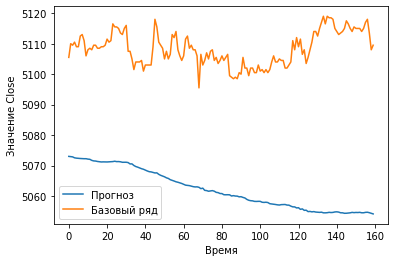

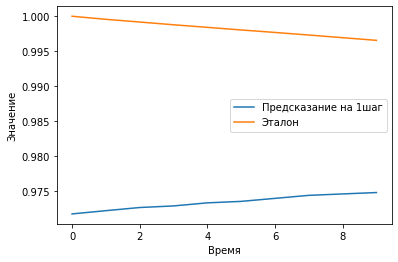

22579/22579 [==============================] - 210s 9ms/step - loss: 9.1781e-04 - val_loss: 1.5792e-04
Epoch 2/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.6518e-04

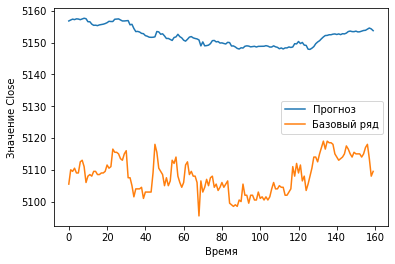

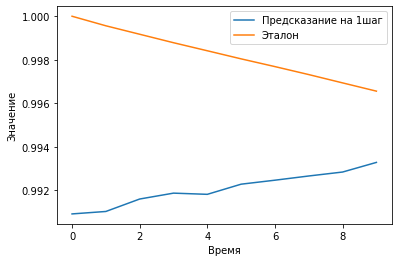

22579/22579 [==============================] - 210s 9ms/step - loss: 1.6518e-04 - val_loss: 1.0260e-04
Epoch 3/50
22574/22579 [============================>.] - ETA: 0s - loss: 9.5031e-05

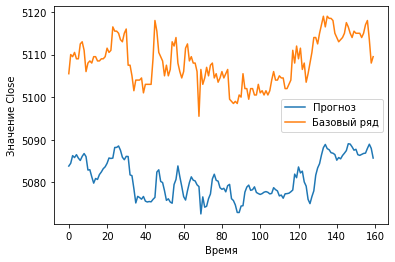

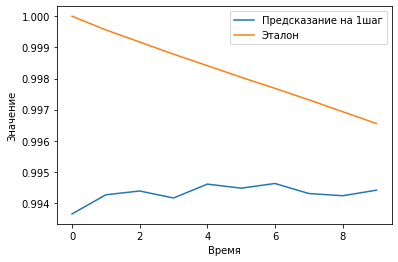

22579/22579 [==============================] - 211s 9ms/step - loss: 9.5029e-05 - val_loss: 4.1493e-05
Epoch 4/50
22579/22579 [==============================] - ETA: 0s - loss: 6.7234e-05

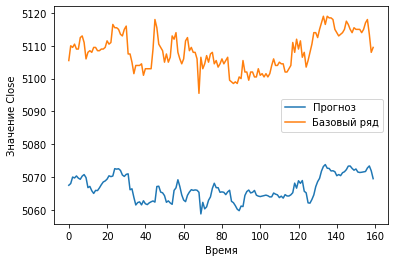

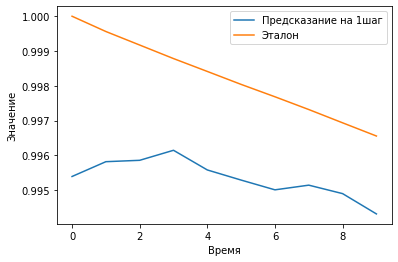

22579/22579 [==============================] - 211s 9ms/step - loss: 6.7234e-05 - val_loss: 4.7530e-04
Epoch 5/50
22574/22579 [============================>.] - ETA: 0s - loss: 5.1326e-05

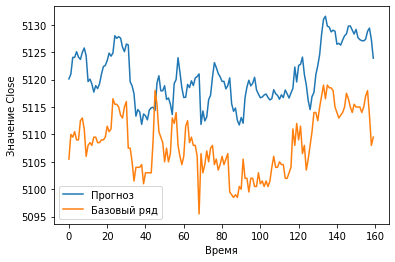

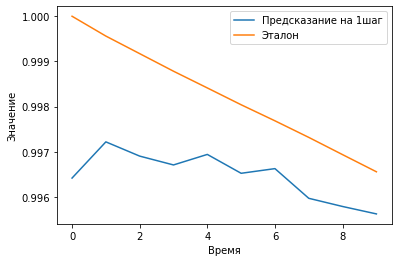

22579/22579 [==============================] - 211s 9ms/step - loss: 5.1326e-05 - val_loss: 1.0160e-05
Epoch 6/50
22576/22579 [============================>.] - ETA: 0s - loss: 4.0739e-05

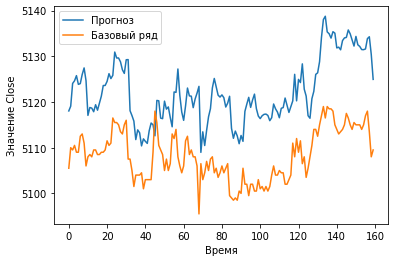

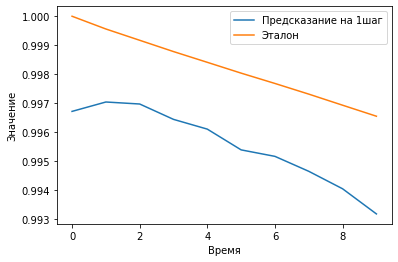

22579/22579 [==============================] - 211s 9ms/step - loss: 4.0736e-05 - val_loss: 8.8673e-06
Epoch 7/50
22575/22579 [============================>.] - ETA: 0s - loss: 3.6587e-05

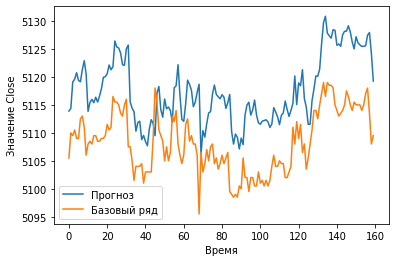

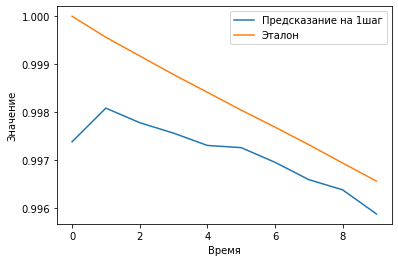

22579/22579 [==============================] - 212s 9ms/step - loss: 3.6583e-05 - val_loss: 1.0763e-05
Epoch 8/50
22576/22579 [============================>.] - ETA: 0s - loss: 3.1336e-05

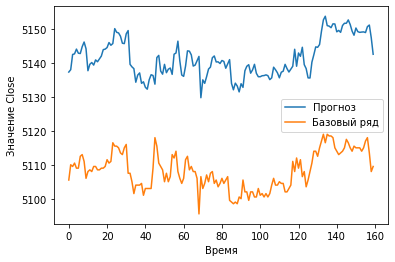

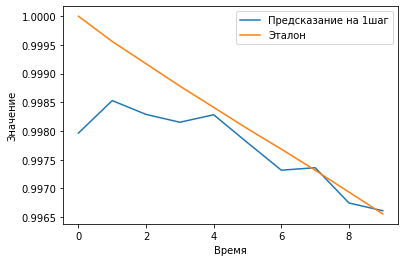

22579/22579 [==============================] - 212s 9ms/step - loss: 3.1350e-05 - val_loss: 4.6692e-05
Epoch 9/50
22574/22579 [============================>.] - ETA: 0s - loss: 2.8006e-05

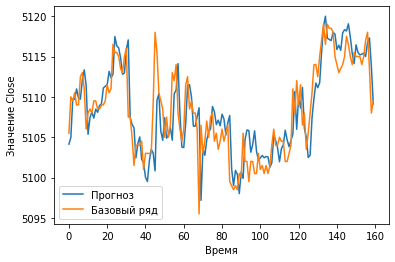

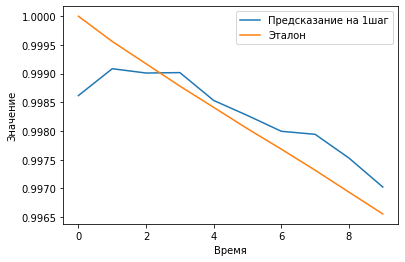

22579/22579 [==============================] - 212s 9ms/step - loss: 2.8000e-05 - val_loss: 2.0463e-06
Epoch 10/50
22576/22579 [============================>.] - ETA: 0s - loss: 2.8677e-05

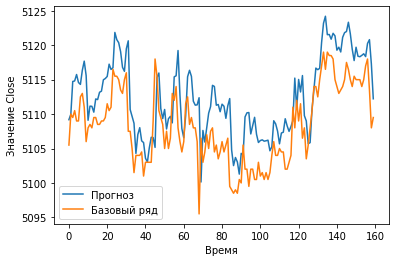

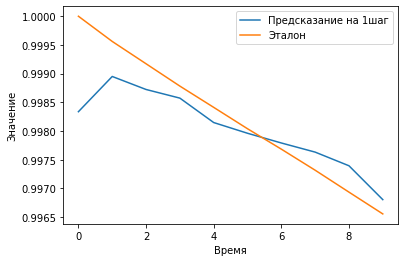

22579/22579 [==============================] - 211s 9ms/step - loss: 2.8675e-05 - val_loss: 2.1802e-06
Epoch 11/50
22579/22579 [==============================] - ETA: 0s - loss: 2.6343e-05

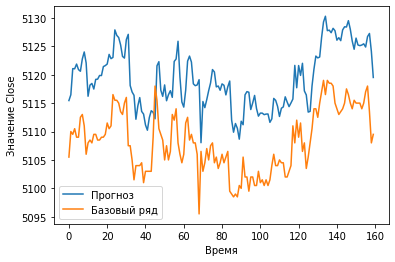

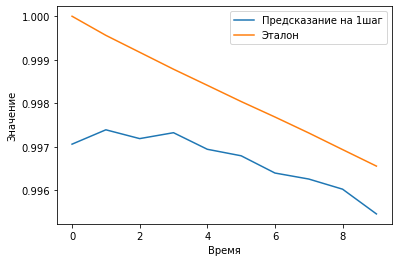

22579/22579 [==============================] - 212s 9ms/step - loss: 2.6343e-05 - val_loss: 6.2453e-06
Epoch 12/50
22578/22579 [============================>.] - ETA: 0s - loss: 2.4735e-05

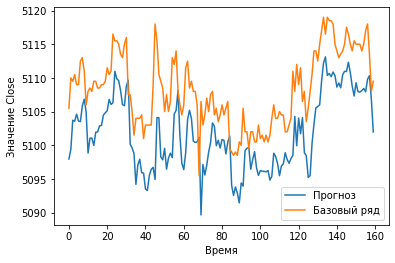

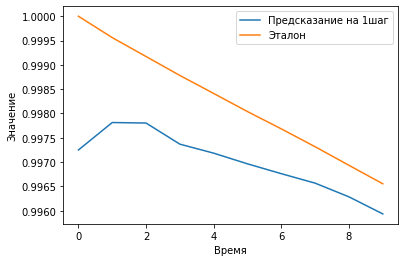

22579/22579 [==============================] - 212s 9ms/step - loss: 2.4734e-05 - val_loss: 1.5630e-05
Epoch 13/50
22574/22579 [============================>.] - ETA: 0s - loss: 2.2507e-05

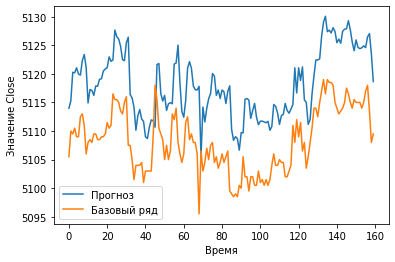

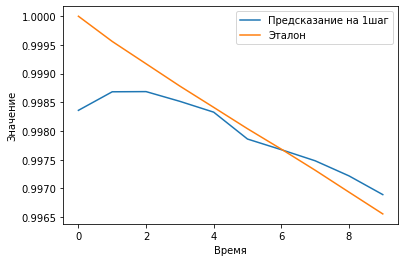

22579/22579 [==============================] - 212s 9ms/step - loss: 2.2503e-05 - val_loss: 3.0913e-06
Epoch 14/50
22579/22579 [==============================] - ETA: 0s - loss: 2.1265e-05

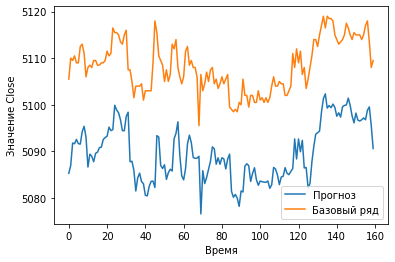

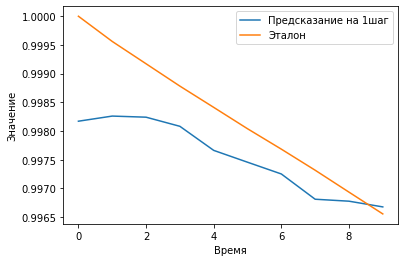

22579/22579 [==============================] - 212s 9ms/step - loss: 2.1265e-05 - val_loss: 1.1216e-05
Epoch 15/50
22579/22579 [==============================] - ETA: 0s - loss: 2.1062e-05

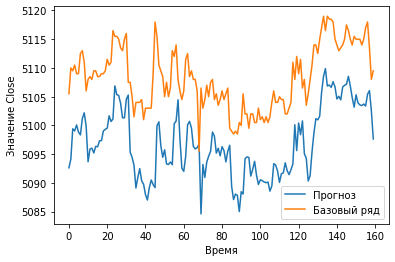

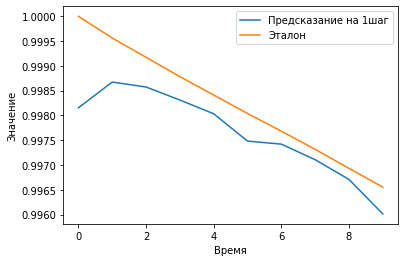

22579/22579 [==============================] - 212s 9ms/step - loss: 2.1062e-05 - val_loss: 6.0746e-06
Epoch 16/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.9466e-05

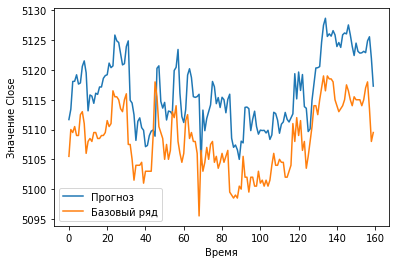

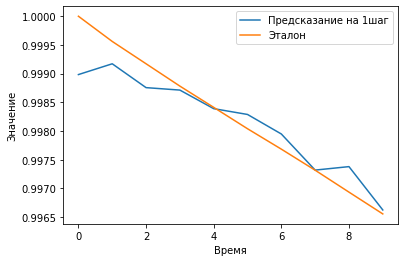

22579/22579 [==============================] - 212s 9ms/step - loss: 1.9463e-05 - val_loss: 6.0259e-06
Epoch 17/50
22574/22579 [============================>.] - ETA: 0s - loss: 1.9108e-05

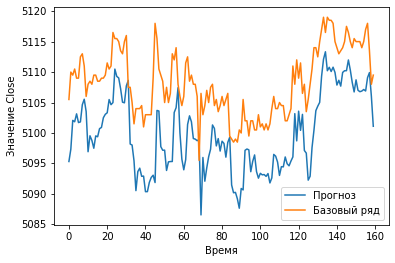

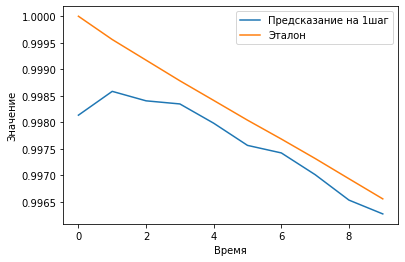

22579/22579 [==============================] - 211s 9ms/step - loss: 1.9105e-05 - val_loss: 7.0831e-06
Epoch 18/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.8130e-05

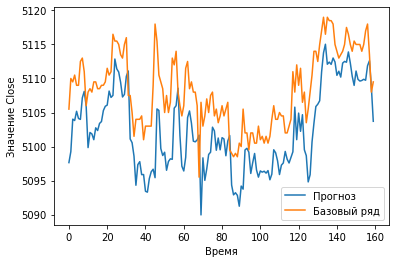

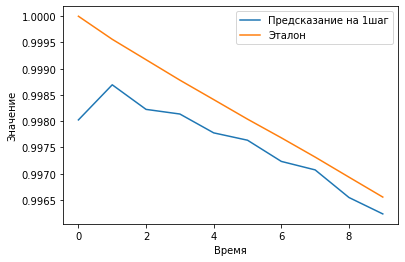

22579/22579 [==============================] - 211s 9ms/step - loss: 1.8128e-05 - val_loss: 7.1866e-06
Epoch 19/50
22578/22579 [============================>.] - ETA: 0s - loss: 1.9118e-05

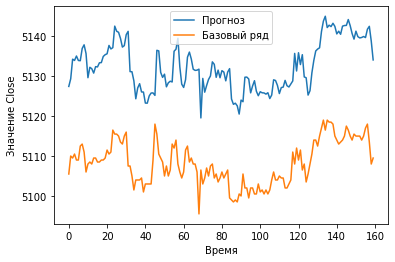

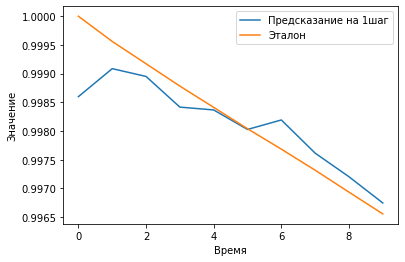

22579/22579 [==============================] - 210s 9ms/step - loss: 1.9118e-05 - val_loss: 4.6215e-05
Epoch 20/50
22578/22579 [============================>.] - ETA: 0s - loss: 1.7461e-05

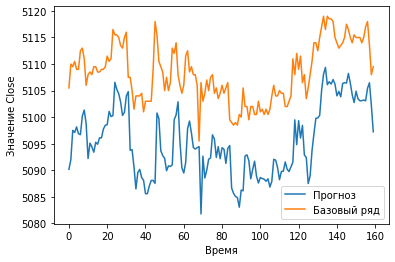

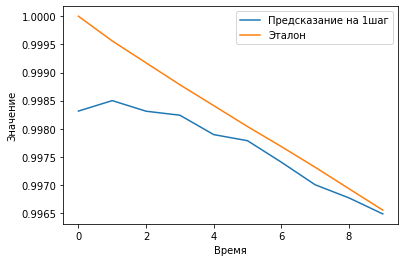

22579/22579 [==============================] - 210s 9ms/step - loss: 1.7461e-05 - val_loss: 1.4270e-05
Epoch 21/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.7171e-05

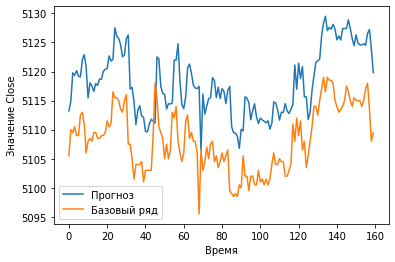

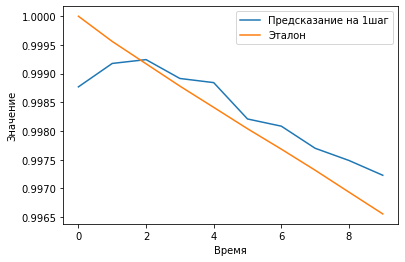

22579/22579 [==============================] - 209s 9ms/step - loss: 1.7171e-05 - val_loss: 5.4685e-06
Epoch 22/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.6531e-05

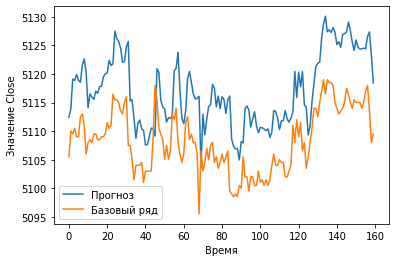

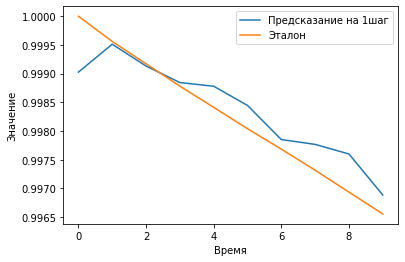

22579/22579 [==============================] - 210s 9ms/step - loss: 1.6529e-05 - val_loss: 9.1752e-06
Epoch 23/50
22574/22579 [============================>.] - ETA: 0s - loss: 1.6790e-05

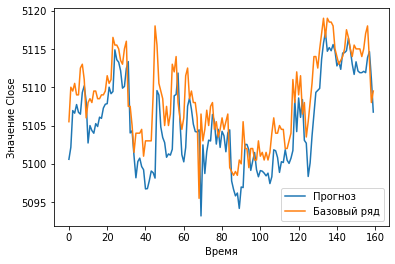

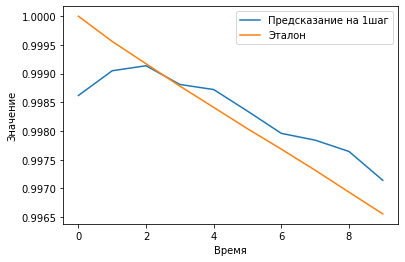

22579/22579 [==============================] - 210s 9ms/step - loss: 1.6789e-05 - val_loss: 2.4594e-06
Epoch 24/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.6004e-05

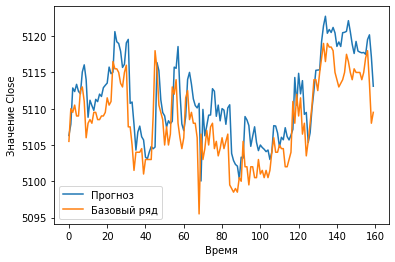

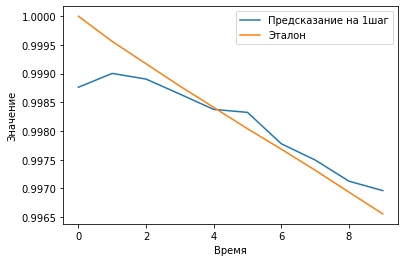

22579/22579 [==============================] - 210s 9ms/step - loss: 1.6002e-05 - val_loss: 4.6314e-06
Epoch 25/50
22575/22579 [============================>.] - ETA: 0s - loss: 1.6162e-05

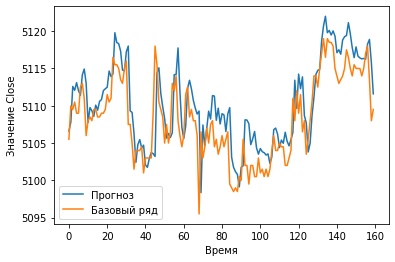

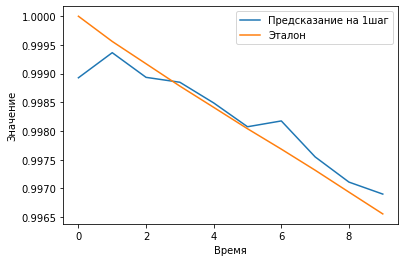

22579/22579 [==============================] - 210s 9ms/step - loss: 1.6159e-05 - val_loss: 1.9675e-06
Epoch 26/50
22575/22579 [============================>.] - ETA: 0s - loss: 1.5798e-05

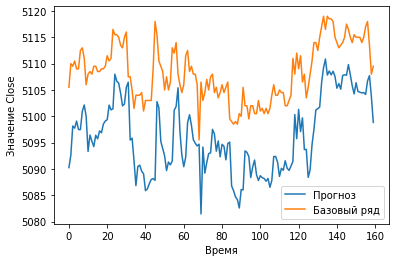

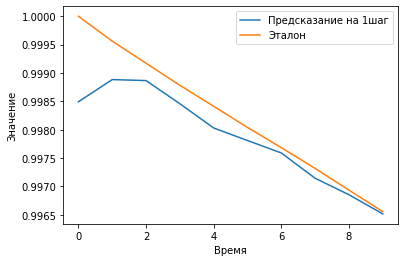

22579/22579 [==============================] - 211s 9ms/step - loss: 1.5804e-05 - val_loss: 6.8239e-06
Epoch 27/50
22579/22579 [==============================] - ETA: 0s - loss: 1.7266e-05

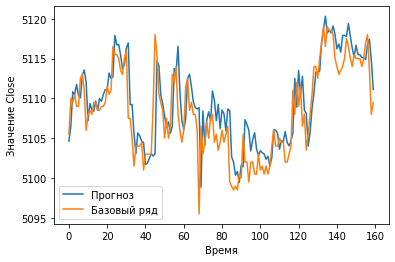

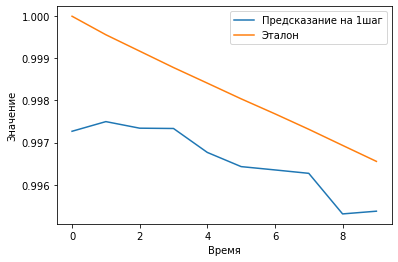

22579/22579 [==============================] - 211s 9ms/step - loss: 1.7266e-05 - val_loss: 1.1430e-05
Epoch 28/50
22579/22579 [==============================] - ETA: 0s - loss: 1.4179e-05

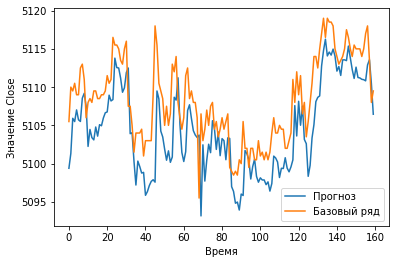

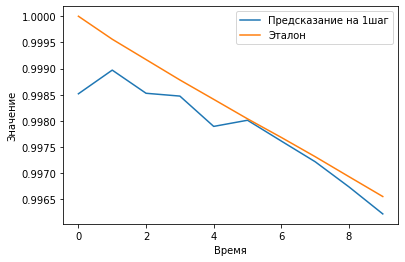

22579/22579 [==============================] - 210s 9ms/step - loss: 1.4179e-05 - val_loss: 3.5906e-06
Epoch 29/50
22578/22579 [============================>.] - ETA: 0s - loss: 1.4682e-05

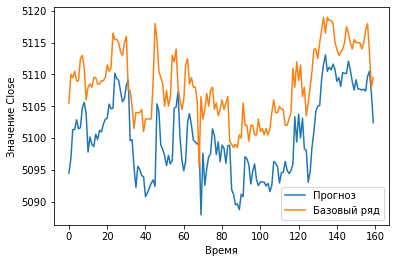

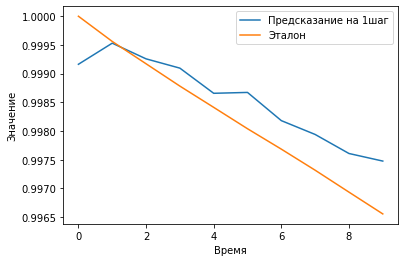

22579/22579 [==============================] - 210s 9ms/step - loss: 1.4681e-05 - val_loss: 3.4456e-06
Epoch 30/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.5294e-05

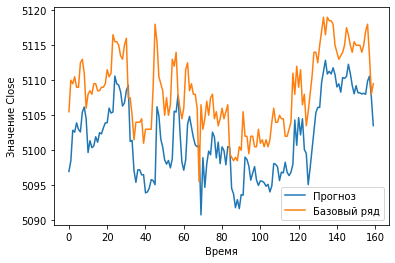

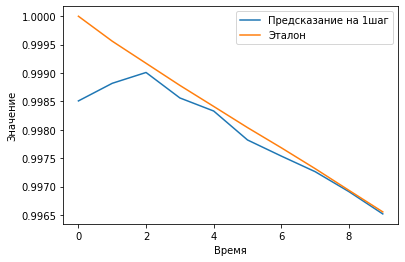

22579/22579 [==============================] - 212s 9ms/step - loss: 1.5293e-05 - val_loss: 2.4055e-06
Epoch 31/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.4453e-05

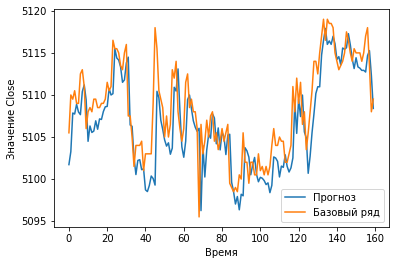

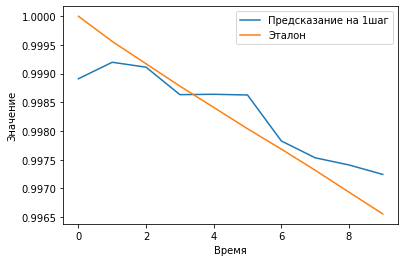

22579/22579 [==============================] - 212s 9ms/step - loss: 1.4453e-05 - val_loss: 2.9316e-06
Epoch 32/50
22579/22579 [==============================] - ETA: 0s - loss: 1.3166e-05

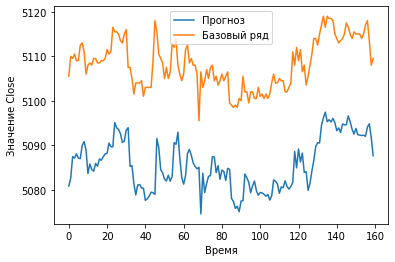

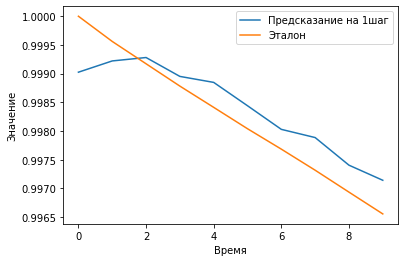

22579/22579 [==============================] - 212s 9ms/step - loss: 1.3166e-05 - val_loss: 3.4800e-05
Epoch 33/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.3116e-05

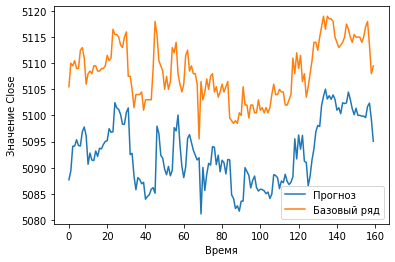

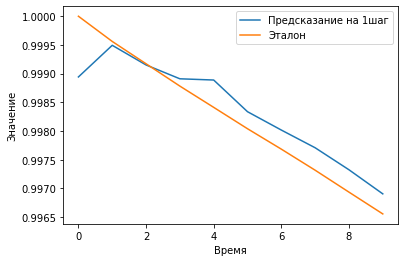

22579/22579 [==============================] - 212s 9ms/step - loss: 1.3115e-05 - val_loss: 8.9995e-06
Epoch 34/50
22578/22579 [============================>.] - ETA: 0s - loss: 1.4238e-05

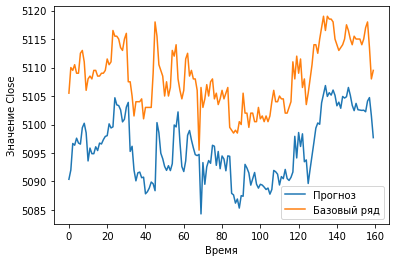

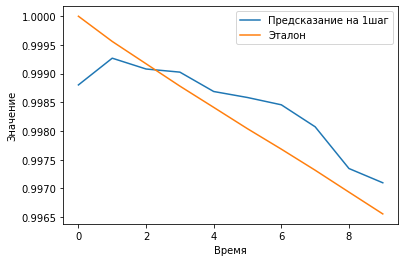

22579/22579 [==============================] - 212s 9ms/step - loss: 1.4237e-05 - val_loss: 1.1569e-05
Epoch 35/50
22578/22579 [============================>.] - ETA: 0s - loss: 1.2901e-05

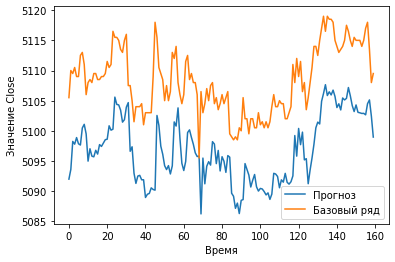

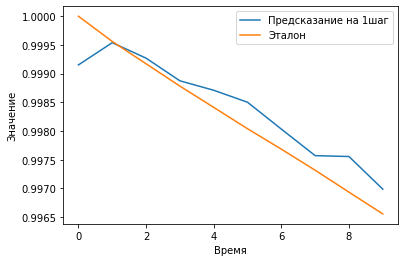

22579/22579 [==============================] - 213s 9ms/step - loss: 1.2901e-05 - val_loss: 1.5851e-05
Epoch 36/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.4082e-05

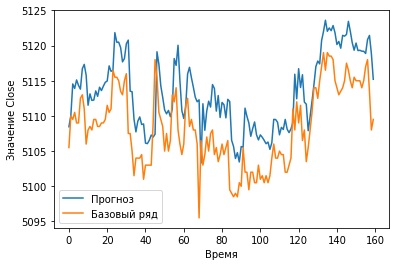

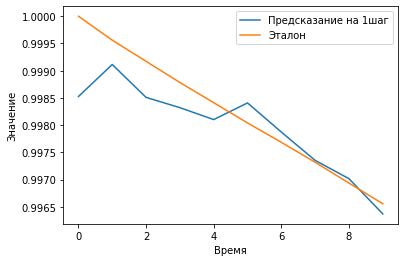

22579/22579 [==============================] - 212s 9ms/step - loss: 1.4084e-05 - val_loss: 4.1916e-06
Epoch 37/50
22574/22579 [============================>.] - ETA: 0s - loss: 1.3514e-05

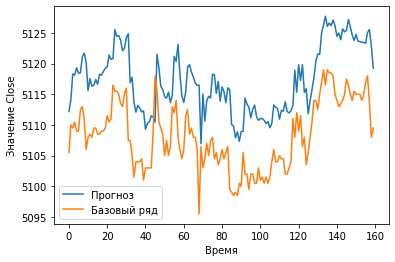

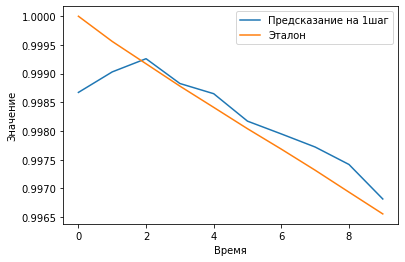

22579/22579 [==============================] - 213s 9ms/step - loss: 1.3511e-05 - val_loss: 2.4590e-06
Epoch 38/50
22578/22579 [============================>.] - ETA: 0s - loss: 1.3854e-05

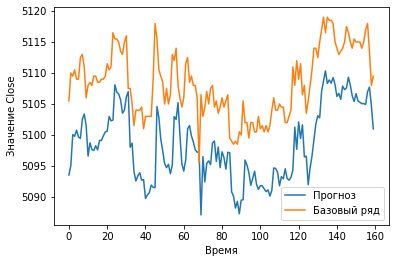

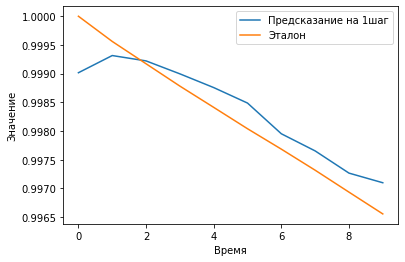

22579/22579 [==============================] - 213s 9ms/step - loss: 1.3854e-05 - val_loss: 3.3403e-06
Epoch 39/50
22574/22579 [============================>.] - ETA: 0s - loss: 1.2731e-05

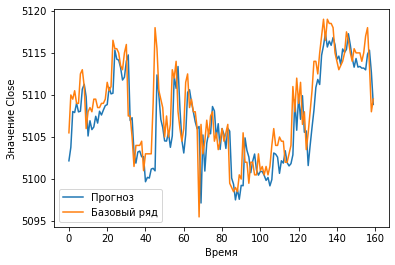

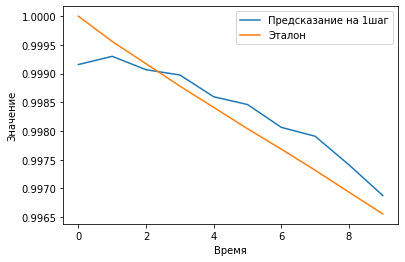

22579/22579 [==============================] - 214s 9ms/step - loss: 1.2729e-05 - val_loss: 2.3142e-06
Epoch 40/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.2706e-05

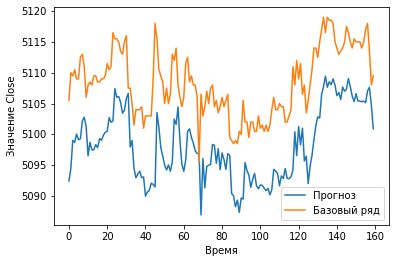

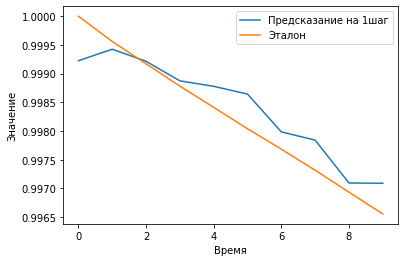

22579/22579 [==============================] - 213s 9ms/step - loss: 1.2705e-05 - val_loss: 8.6907e-06
Epoch 41/50
22576/22579 [============================>.] - ETA: 0s - loss: 1.3056e-05

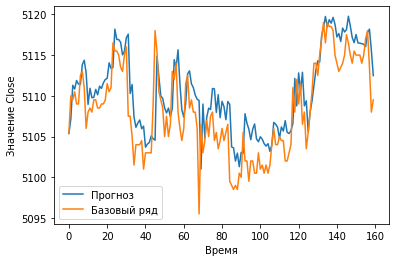

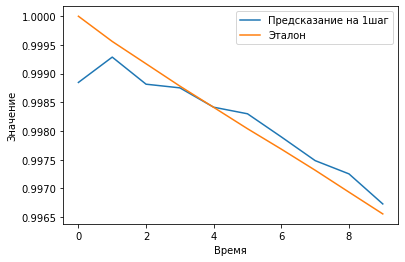

22579/22579 [==============================] - 212s 9ms/step - loss: 1.3055e-05 - val_loss: 1.8051e-06
Epoch 42/50
22579/22579 [==============================] - ETA: 0s - loss: 1.3298e-05

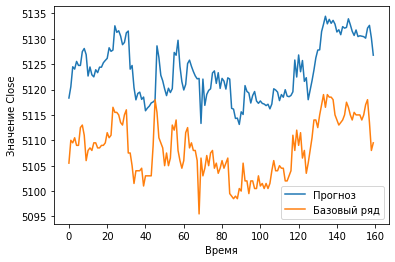

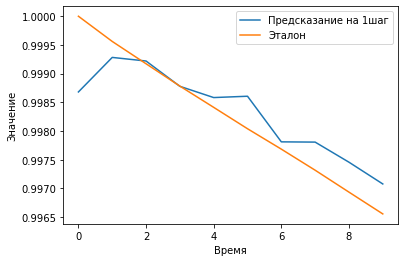

22579/22579 [==============================] - 211s 9ms/step - loss: 1.3298e-05 - val_loss: 6.6131e-06
Epoch 43/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.2351e-05

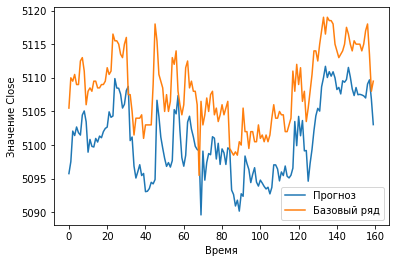

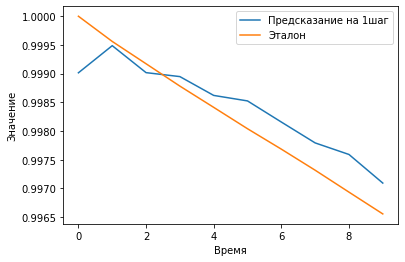

22579/22579 [==============================] - 211s 9ms/step - loss: 1.2350e-05 - val_loss: 4.0219e-06
Epoch 44/50
22575/22579 [============================>.] - ETA: 0s - loss: 1.2989e-05

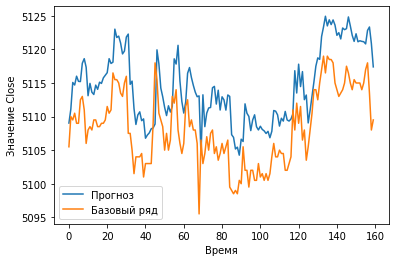

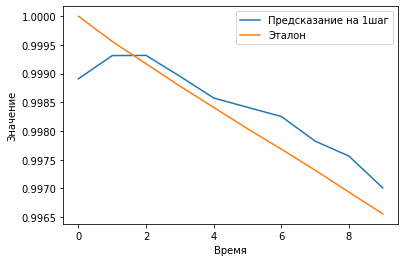

22579/22579 [==============================] - 211s 9ms/step - loss: 1.2987e-05 - val_loss: 1.9196e-06
Epoch 45/50
22574/22579 [============================>.] - ETA: 0s - loss: 1.2380e-05

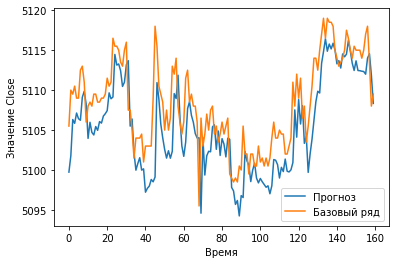

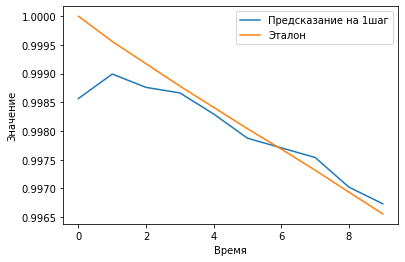

22579/22579 [==============================] - 212s 9ms/step - loss: 1.2378e-05 - val_loss: 3.7992e-06
Epoch 46/50
22574/22579 [============================>.] - ETA: 0s - loss: 1.3329e-05

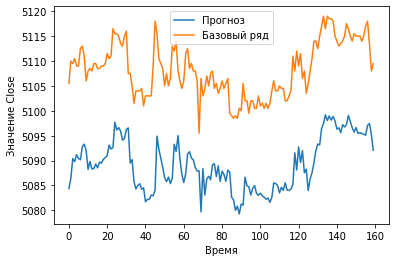

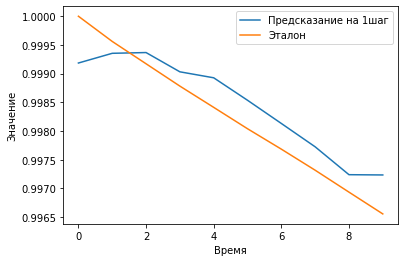

22579/22579 [==============================] - 212s 9ms/step - loss: 1.3332e-05 - val_loss: 2.8258e-05
Epoch 47/50
22575/22579 [============================>.] - ETA: 0s - loss: 1.2169e-05

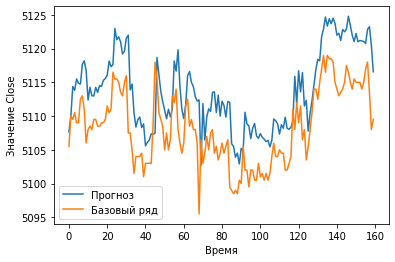

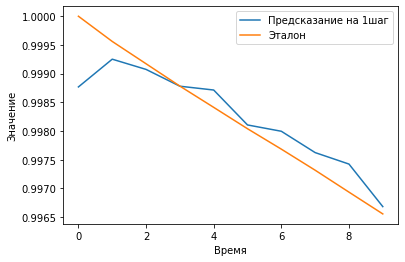

22579/22579 [==============================] - 211s 9ms/step - loss: 1.2168e-05 - val_loss: 3.7228e-06
Epoch 48/50
22577/22579 [============================>.] - ETA: 0s - loss: 1.1420e-05

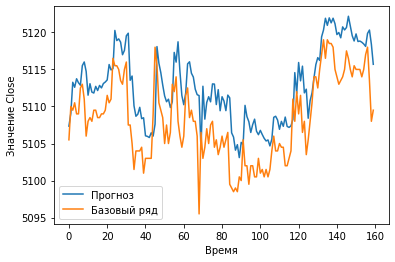

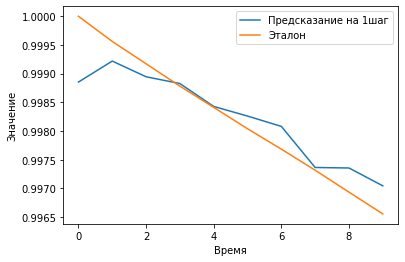

22579/22579 [==============================] - 212s 9ms/step - loss: 1.1419e-05 - val_loss: 1.8998e-06
Epoch 49/50
22575/22579 [============================>.] - ETA: 0s - loss: 1.3032e-05

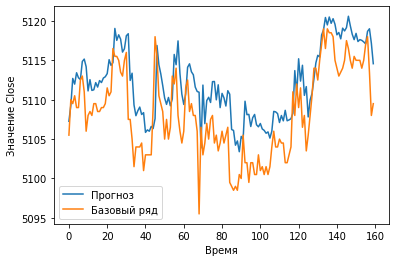

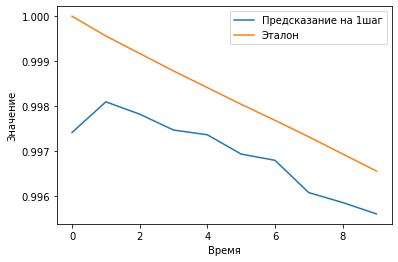

22579/22579 [==============================] - 211s 9ms/step - loss: 1.3039e-05 - val_loss: 2.2629e-05
Epoch 50/50
22575/22579 [============================>.] - ETA: 0s - loss: 1.2057e-05

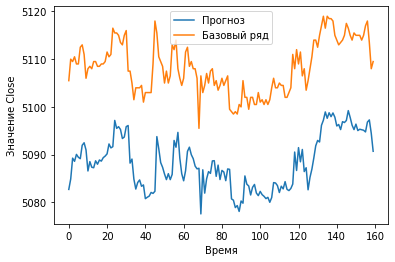

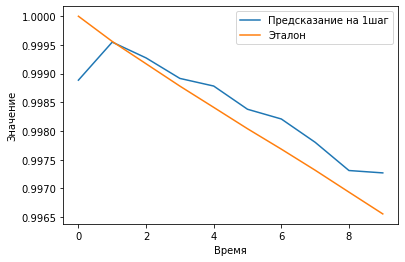

22579/22579 [==============================] - 211s 9ms/step - loss: 1.2057e-05 - val_loss: 8.0957e-06


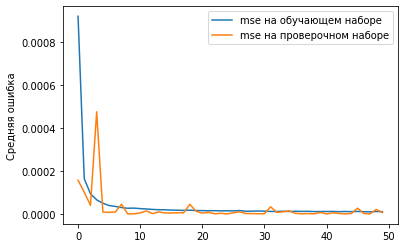

In [ ]:
modelD = Sequential()
modelD.add(Conv1D(200, 5, padding='same', input_shape = (xLen, 35), activation='tanh'))
modelD.add(Conv1D(200,5, padding='same', activation='tanh'))
modelD.add(MaxPooling1D(4))
modelD.add(LSTM(40, return_sequences=True))
modelD.add(Flatten())
modelD.add(Dense(200, activation='tanh'))
modelD.add(Dense(100, activation='tanh'))
modelD.add(Dense(1, activation='tanh'))

modelD.compile(loss='mse', optimizer=Adam(lr=1e-4))

history = modelD.fit_generator(trainDataGen,
                               epochs=50,
                               verbose=1,
                               validation_data=testDataGen,
                               callbacks=[pltMae])

plt.plot(history.history['loss'], label='mse на обучающем наборе')
plt.plot(history.history['val_loss'], label='mse на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()